In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from xgboost import XGBClassifier, plot_importance

Calculating entropy using math

In [2]:
def calculate_entropy(y):
    class_labels , counts = np.unique(y , return_counts=True)
    probabilities = counts / len(y)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy


y_messy = [0, 0, 0, 0, 1, 1, 1, 1] 
print(f"Entropy of messy set: {calculate_entropy(y_messy):.4f}")
y_clean = [1, 1, 1, 1, 1, 1, 1, 1]
print(f"Entropy of clean set: {calculate_entropy(y_clean):.4f}")

Entropy of messy set: 1.0000
Entropy of clean set: -0.0000


Calculating Information gain 

In [3]:
def calculate_information_gain(parent , left_child , right_child):
    entropy_parent = calculate_entropy(parent)
    weight_left = len(left_child) / len(parent)
    weight_right = len(right_child) / len(parent)

    entropy_left = calculate_entropy(left_child)
    entropy_right = calculate_entropy(right_child)    

    weighted_child_entropy = (weight_left * entropy_left) + (weight_right * entropy_right)
    information_gain = entropy_parent - weighted_child_entropy

    return information_gain


parent = [0,0,0,1,1,1]

left_A = [0,0,0]
right_A = [1,1,1]

left_B = [0, 0, 1]  
right_B = [0, 1, 1]

left_C = [0,0,0,0]
right_C = [0,1]

# Calculate
gain_A = calculate_information_gain(parent, left_A, right_A)
gain_B = calculate_information_gain(parent, left_B, right_B)
gain_C = calculate_information_gain(parent, left_C, right_C)

print(f"Parent Entropy: {calculate_entropy(parent):.4f}")
print(f"Gain from Split A : {gain_A:.4f}")
print(f"Gain from Split B : {gain_B:.4f}")
print(f"Gain from Split C : {gain_C:.4f}")

Parent Entropy: 1.0000
Gain from Split A : 1.0000
Gain from Split B : 0.0817
Gain from Split C : 0.6667


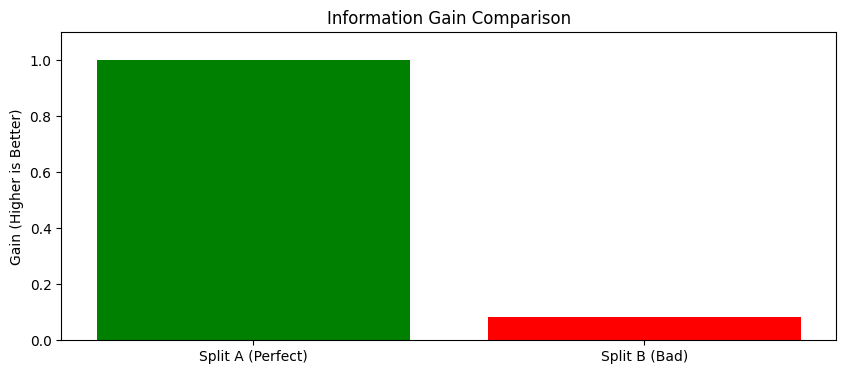

In [4]:
# Visualize the Logic
plt.figure(figsize=(10, 4))
plt.bar(['Split A (Perfect)', 'Split B (Bad)'], [gain_A, gain_B], color=['green', 'red'])
plt.title("Information Gain Comparison")
plt.ylabel("Gain (Higher is Better)")
plt.ylim(0, 1.1)
plt.show()

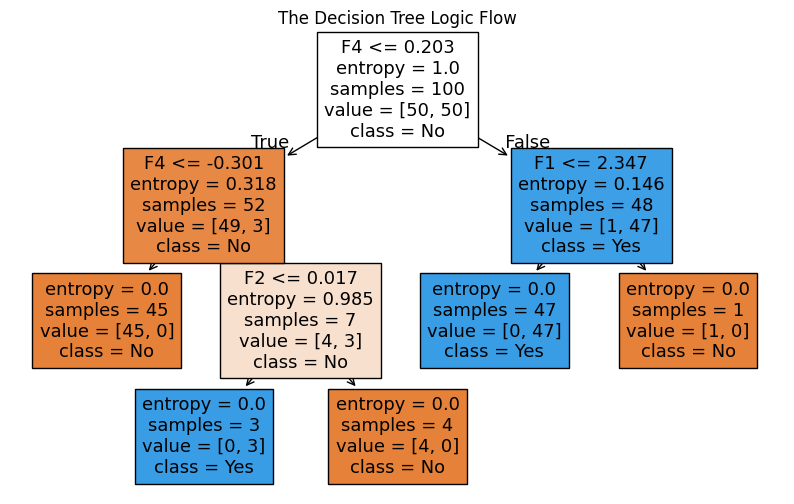

In [5]:
X, y = make_classification(n_samples=100, n_features=4, random_state=42)

# 2. Train the "Doctor"
# max_depth=3: Constrain the doctor to 3 questions to prevent overfitting (memorization)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X, y)

# 3. Visualize the Brain
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=['F1', 'F2', 'F3', 'F4'], class_names=['No', 'Yes'])
plt.title("The Decision Tree Logic Flow")
plt.show()

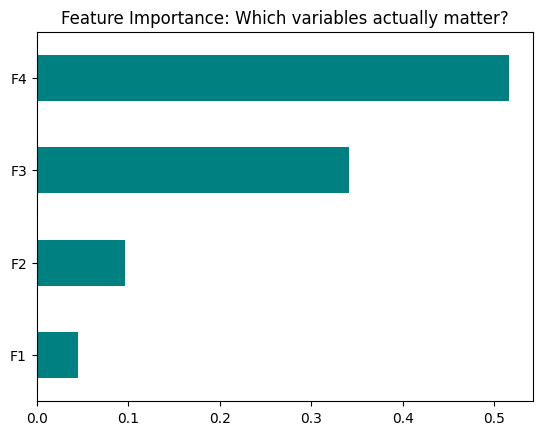

In [12]:
rf = RandomForestClassifier(n_estimators = 100 , random_state = 42)
rf.fit(X,y)
# Feature importance 
importances = pd.Series(rf.feature_importances_, index=['F1', 'F2', 'F3', 'F4'])
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance: Which variables actually matter?")
plt.show()

Implementing XG Boost Algorithm

<Figure size 1000x600 with 0 Axes>

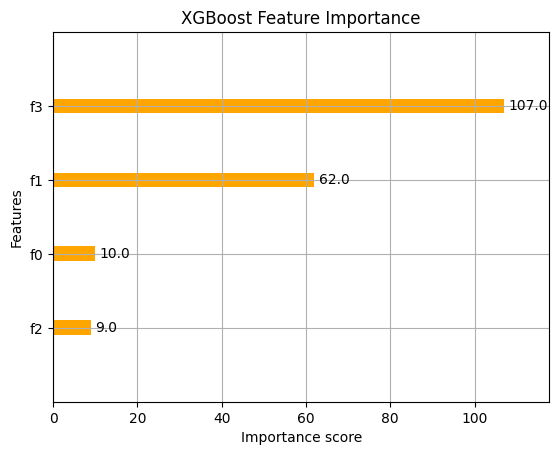

In [16]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X, y)
plt.figure(figsize=(10, 6))
plot_importance(xgb, importance_type='weight', color='orange')
plt.title("XGBoost Feature Importance")
plt.show()